In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 🧠 Perceptron From Scratch (No Libraries)

In this notebook, I implement the Perceptron binary classifier using only core Python.

The goal is to understand how the algorithm works at a low level—without any machine learning libraries like `scikit-learn`.

---

## ✨ Learning Objectives

- Understand the perceptron learning rule
- Implement the algorithm step by step
- Apply it to a logical dataset (AND gate)


## 📚 Perceptron Theory

The perceptron is a binary classifier that predicts using the rule:
$$
\hat{y} = \text{sign}(\mathbf{w} \cdot \mathbf{x} + b)
$$

If the prediction is wrong, we update:

$$
\mathbf{w} = \mathbf{w} + \eta y \mathbf{x} \\
b = b + \eta y
$$


## 🛠️ Perceptron Class (Pure Python)

In [6]:
class Perceptron:
    def __init__(self, learning_rate=0.1, n_epochs=10):
        self.lr = learning_rate
        self.n_epochs = n_epochs
        self.weights = []
        self.bias = 0

    def predict(self, x):
        activation = sum(w * xi for w, xi in zip(self.weights, x)) + self.bias
        return 1 if activation >= 0 else -1

    def fit(self, X, y):
        n_features = len(X[0])
        self.weights = [0.0] * n_features
        self.bias = 0

        print("Initial weights:", self.weights)
        print("Initial bias:", self.bias)
        print("-" * 40)

        for epoch in range(1, self.n_epochs + 1):
            print(f"Epoch {epoch}")
            for xi, target in zip(X, y):
                prediction = self.predict(xi)
                if prediction != target:
                    update = self.lr * target
                    self.weights = [w + update * xij for w, xij in zip(self.weights, xi)]
                    self.bias += update
                    print(f"  Misclassified: prediction={prediction}, y={target}")
                    print(f"  → Update: Δw = {update}, new weights = {self.weights}, new bias = {self.bias}")
                else:
                    print(f"  Correct: x={prediction}, y={target}")
            print("-" * 40)

    def final_model(self):
        return self.weights, self.bias


## 🧪 Dataset – AND Gate

This is a simple binary classification task. The output is 1 only when both inputs are 1.


In [21]:
# AND gate data
X = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
]
y = [-1, -1, -1, 1]  # AND function with labels in {-1, +1}

## 🧮 Training Logs

In [22]:
# Train
model = Perceptron(learning_rate=0.1, n_epochs=5)
model.fit(X, y)

# Final model
weights, bias = model.final_model()
print("Final weights:", weights)
print("Final bias:", bias)


Initial weights: [0.0, 0.0]
Initial bias: 0
----------------------------------------
Epoch 1
  Misclassified: prediction=1, y=-1
  → Update: Δw = -0.1, new weights = [0.0, 0.0], new bias = -0.1
  Correct: x=-1, y=-1
  Correct: x=-1, y=-1
  Misclassified: prediction=-1, y=1
  → Update: Δw = 0.1, new weights = [0.1, 0.1], new bias = 0.0
----------------------------------------
Epoch 2
  Misclassified: prediction=1, y=-1
  → Update: Δw = -0.1, new weights = [0.1, 0.1], new bias = -0.1
  Misclassified: prediction=1, y=-1
  → Update: Δw = -0.1, new weights = [0.1, 0.0], new bias = -0.2
  Correct: x=-1, y=-1
  Misclassified: prediction=-1, y=1
  → Update: Δw = 0.1, new weights = [0.2, 0.1], new bias = -0.1
----------------------------------------
Epoch 3
  Correct: x=-1, y=-1
  Misclassified: prediction=1, y=-1
  → Update: Δw = -0.1, new weights = [0.2, 0.0], new bias = -0.2
  Misclassified: prediction=1, y=-1
  → Update: Δw = -0.1, new weights = [0.1, 0.0], new bias = -0.30000000000000004
 

## ✅ Final Predictions

In [23]:
# Test
print("\nPredictions:")
for x in X:
    print(f"{x} => {model.predict(x)}")


Predictions:
[0, 0] => -1
[0, 1] => -1
[1, 0] => -1
[1, 1] => 1


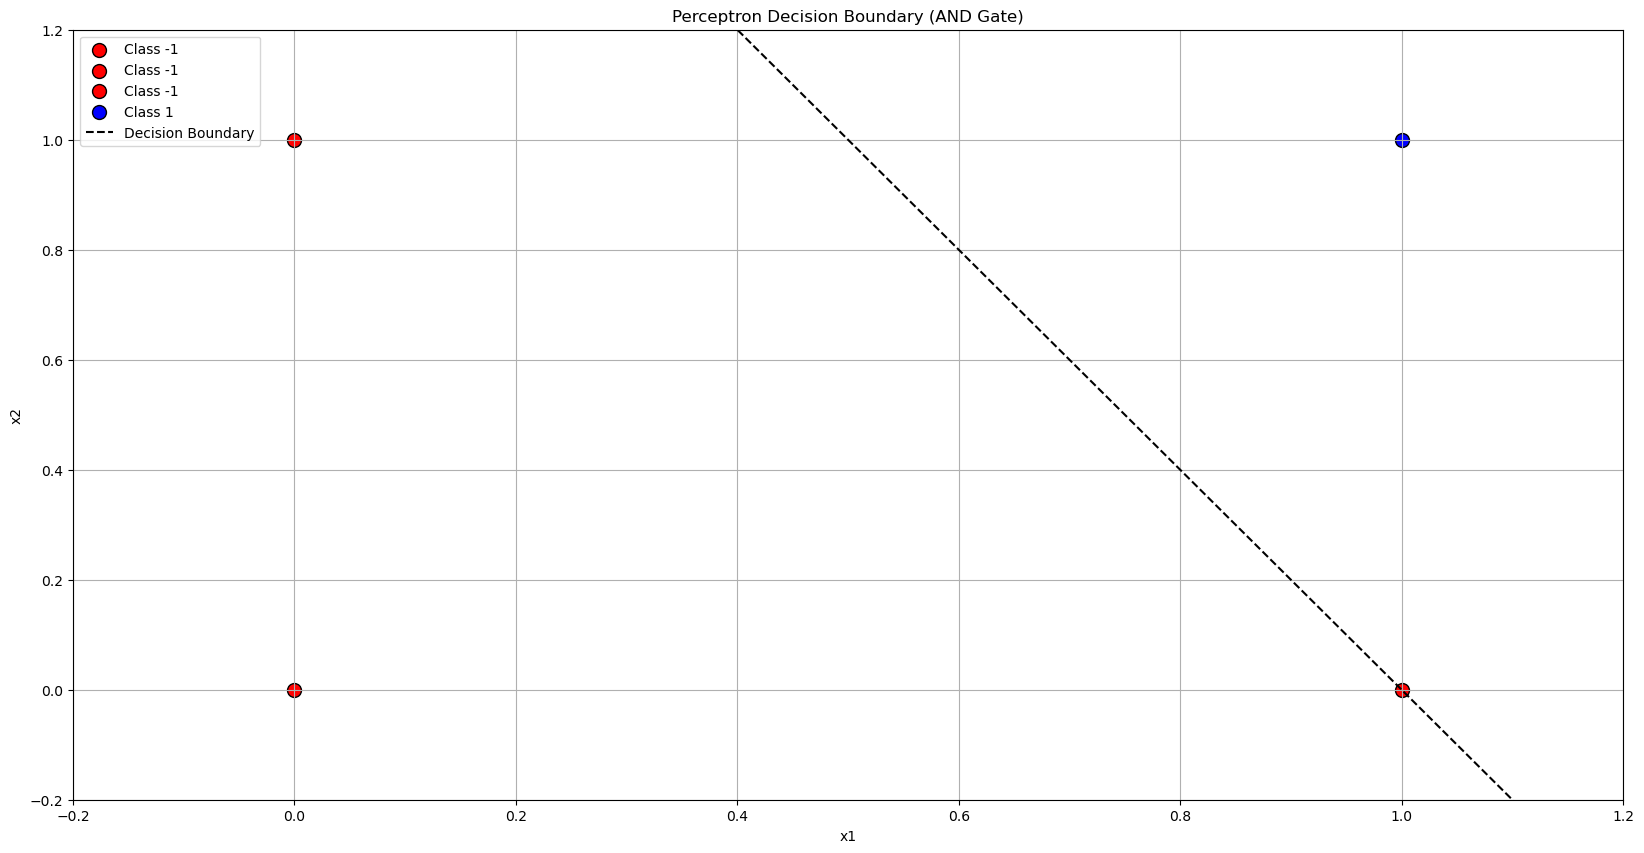

In [28]:
fig, ax = plt.subplots(figsize=(20, 10))
for xi, yi in zip(X, y):
    color = 'blue' if yi == 1 else 'red'
    ax.scatter(xi[0], xi[1], c=color, label=f"Class {yi}", s=100, edgecolors='k')

# Decision boundary: w1*x + w2*y + b = 0
w1, w2 = model.weights
b = model.bias

# Create x1 values
x1_vals = np.linspace(-0.2, 1.2, 100)
# Solve for x2: w1*x1 + w2*x2 + b = 0 → x2 = -(w1*x1 + b)/w2
x2_vals = -(w1 * x1_vals + b) / w2 if w2 != 0 else np.full_like(x1_vals, -b/w1)

ax.plot(x1_vals, x2_vals, 'k--', label='Decision Boundary')

ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.legend(loc='upper left')
ax.set_title("Perceptron Decision Boundary (AND Gate)")
plt.grid(True)
plt.show()